In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
from numpy import array, ndarray, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../../../utils')
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, HEIGHT, plot_line_chart
from studies import naive_Bayes_study, logistic_regression_study, knn_study, trees_study, mlp_study

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/Combined_Flights_2022.csv")
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [3]:
file_tag = "flights"
target_name = "Cancelled"

target = df[target_name]
features = df.drop(columns=[target_name])

features = features.dropna(axis=1, how="all") #drops all cols with all NaN
features = features.dropna(axis=1, how="any") #drops all cols with any NaN

target = target.loc[features.index]

features = features.select_dtypes(include=["number"])

print("Final target distribution:")
print(target.value_counts(dropna=False))

Final target distribution:
Cancelled
False    3955126
True      123192
Name: count, dtype: int64


In [4]:
sample_size = 200000  # smaller because data set is huge, models take too long

features_sampled = features.sample(n=sample_size, random_state=42)
target_sampled = target.loc[features_sampled.index]

print("\nSampled features shape:", features_sampled.shape)
print("Sampled target distribution:")
print(target_sampled.value_counts(dropna=False))

features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    #features_sampled,
    #target_sampled,
    test_size=0.1,
    random_state=42,
    stratify=target
    #stratify=target_sampled
)


Sampled features shape: (200000, 25)
Sampled target distribution:
Cancelled
False    194064
True       5936
Name: count, dtype: int64


In [5]:
target_train_bin = target_train.astype(int)
target_test_bin = target_test.astype(int)

In [9]:
target_test_bin.unique()

array([0, 1])

**NAIVE BAYES ANALYSIS - FLIGHT DATA**

In [13]:
eval_metric = "accuracy"

figure()
nb__best_model_acc, nb__params_acc = naive_Bayes_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    metric=eval_metric
)
savefig(f"../charts/lab1_baseline/{file_tag}_nb_{eval_metric}_study.png", bbox_inches='tight')
show()

figure()
nb__best_model_rec, nb__params_rec = naive_Bayes_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    metric="recall"
)
savefig(f"../charts/lab1_baseline/{file_tag}_nb_recall_study.png", bbox_inches='tight')
show()

ValueError: Negative values in data passed to MultinomialNB (input X).

<Figure size 600x450 with 0 Axes>

In [14]:
prd_trn_nb = nb__best_model_acc.predict(features_train)
prd_tst_nb = nb__best_model_acc.predict(features_test)

nb_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    nb__params_acc,
    array(target_train_bin),
    array(prd_trn_nb),
    array(target_test_bin),
    array(prd_tst_nb),
    nb_labels
)
savefig(f'../charts/lab1_baseline/{file_tag}_{nb__params_acc["name"]}_best_{nb__params_acc["metric"]}_eval.png', bbox_inches='tight')
show()

NameError: name 'nb__best_model_acc' is not defined

**LOGISTIC REGRESSION ANALYSIS - FLIGHT DATA**

LR best for 500 iterations (penalty=l1) with accuracy=0.969958


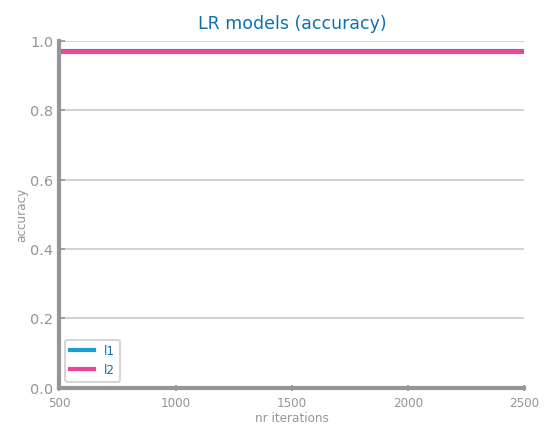

In [11]:
eval_metric = "accuracy"

figure()
lr_best_model, lr_params = logistic_regression_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    nr_max_iterations=2500,
    lag=500,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_lr_{eval_metric}_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

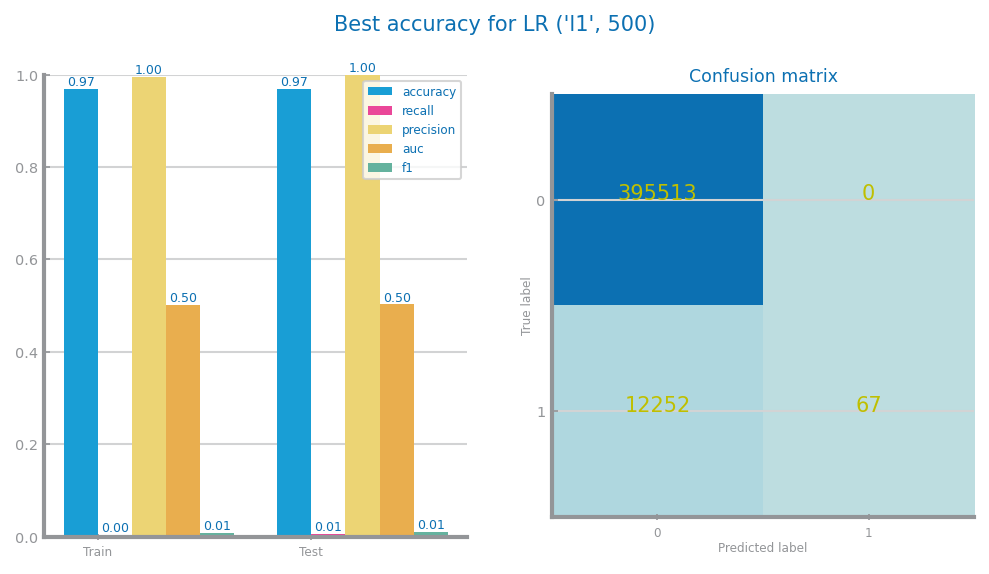

In [12]:
prd_trn_lr = lr_best_model.predict(features_train)
prd_tst_lr = lr_best_model.predict(features_test)

lr_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    lr_params,
    array(target_train_bin),
    array(prd_trn_lr),
    array(target_test_bin),
    array(prd_tst_lr),
    lr_labels,
)
savefig(f'../charts/lab1_baseline/{file_tag}_{lr_params["name"]}_best_{lr_params["metric"]}_eval.png', bbox_inches='tight')
show()

**KNN ANALYSIS - FLIGHT DATA**

KNN best with k=5 and manhattan


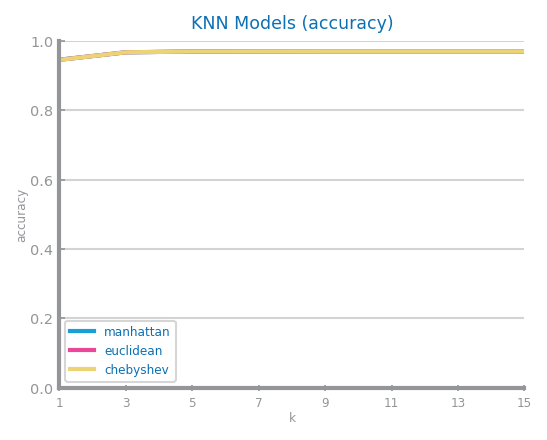

In [ ]:
eval_metric = "accuracy"

figure()
knn_best_model, knn_params = knn_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    k_max=15,
    lag=2,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_knn_{eval_metric}_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

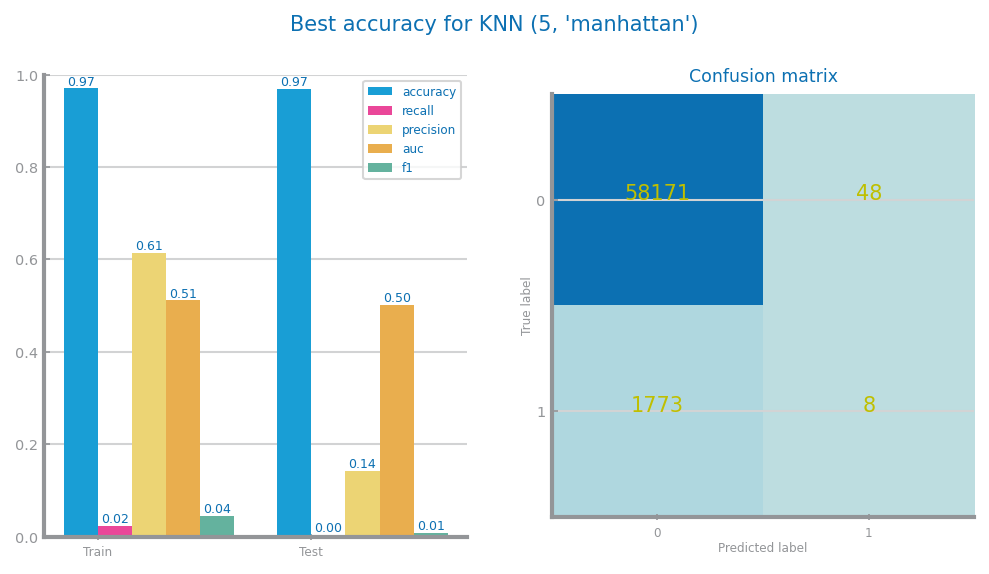

In [ ]:
prd_trn_knn = knn_best_model.predict(features_train)
prd_tst_knn = knn_best_model.predict(features_test)

knn_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    knn_params,
    array(target_train_bin),
    array(prd_trn_knn),
    array(target_test_bin),
    array(prd_tst_knn),
    knn_labels,
)
savefig(f"../charts/lab1_baseline/{file_tag}_{knn_params['name']}_best_{knn_params['metric']}_eval.png", bbox_inches='tight')
show()

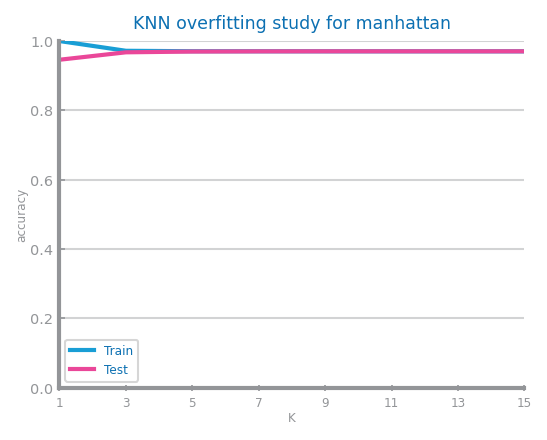

In [ ]:
distance = knn_params["params"][1]   # best distance from KNN study, e.g. 'euclidean'
K_MAX = 15
kvalues = [i for i in range(1, K_MAX + 1, 2)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(features_train, target_train_bin)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test_bin, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train_bin, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_knn_overfitting.png", bbox_inches='tight')
show()

**DECISION TREES ANALYSIS - FLIGHT DATA**

DT best with entropy and d=12


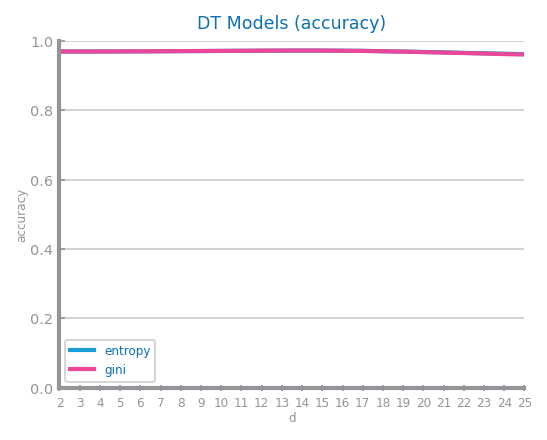

In [15]:
eval_metric = "accuracy"

figure()
dt_best_model, dt_params = trees_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    d_max=25,
    lag=1,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_{eval_metric}_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

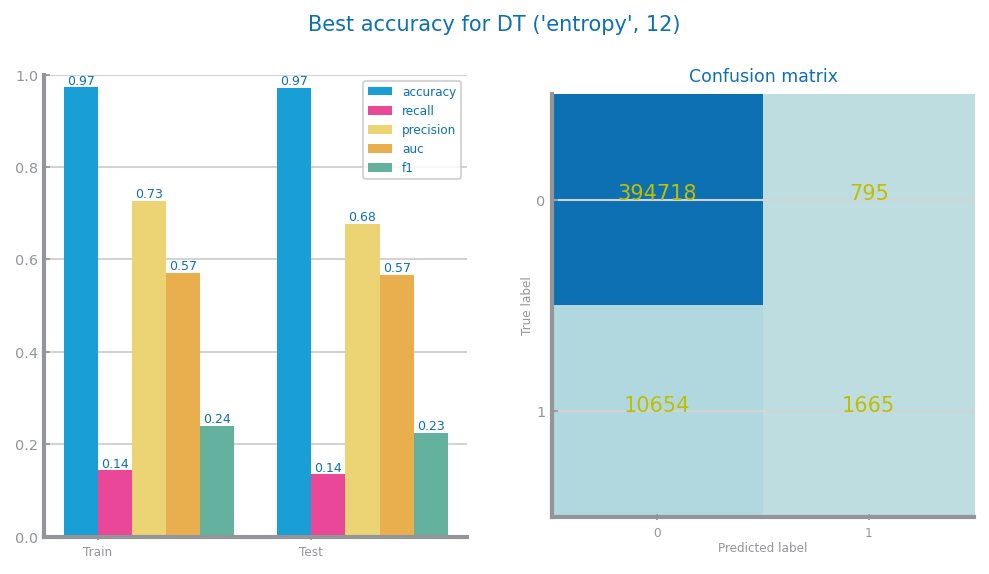

In [16]:
prd_trn_dt = dt_best_model.predict(features_train)
prd_tst_dt = dt_best_model.predict(features_test)

dt_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    dt_params,
    array(target_train_bin),
    array(prd_trn_dt),
    array(target_test_bin),
    array(prd_tst_dt),
    dt_labels,
)
savefig(f'../charts/lab1_baseline/{file_tag}_{dt_params["name"]}_best_{dt_params["metric"]}_eval.png', bbox_inches='tight')
show()

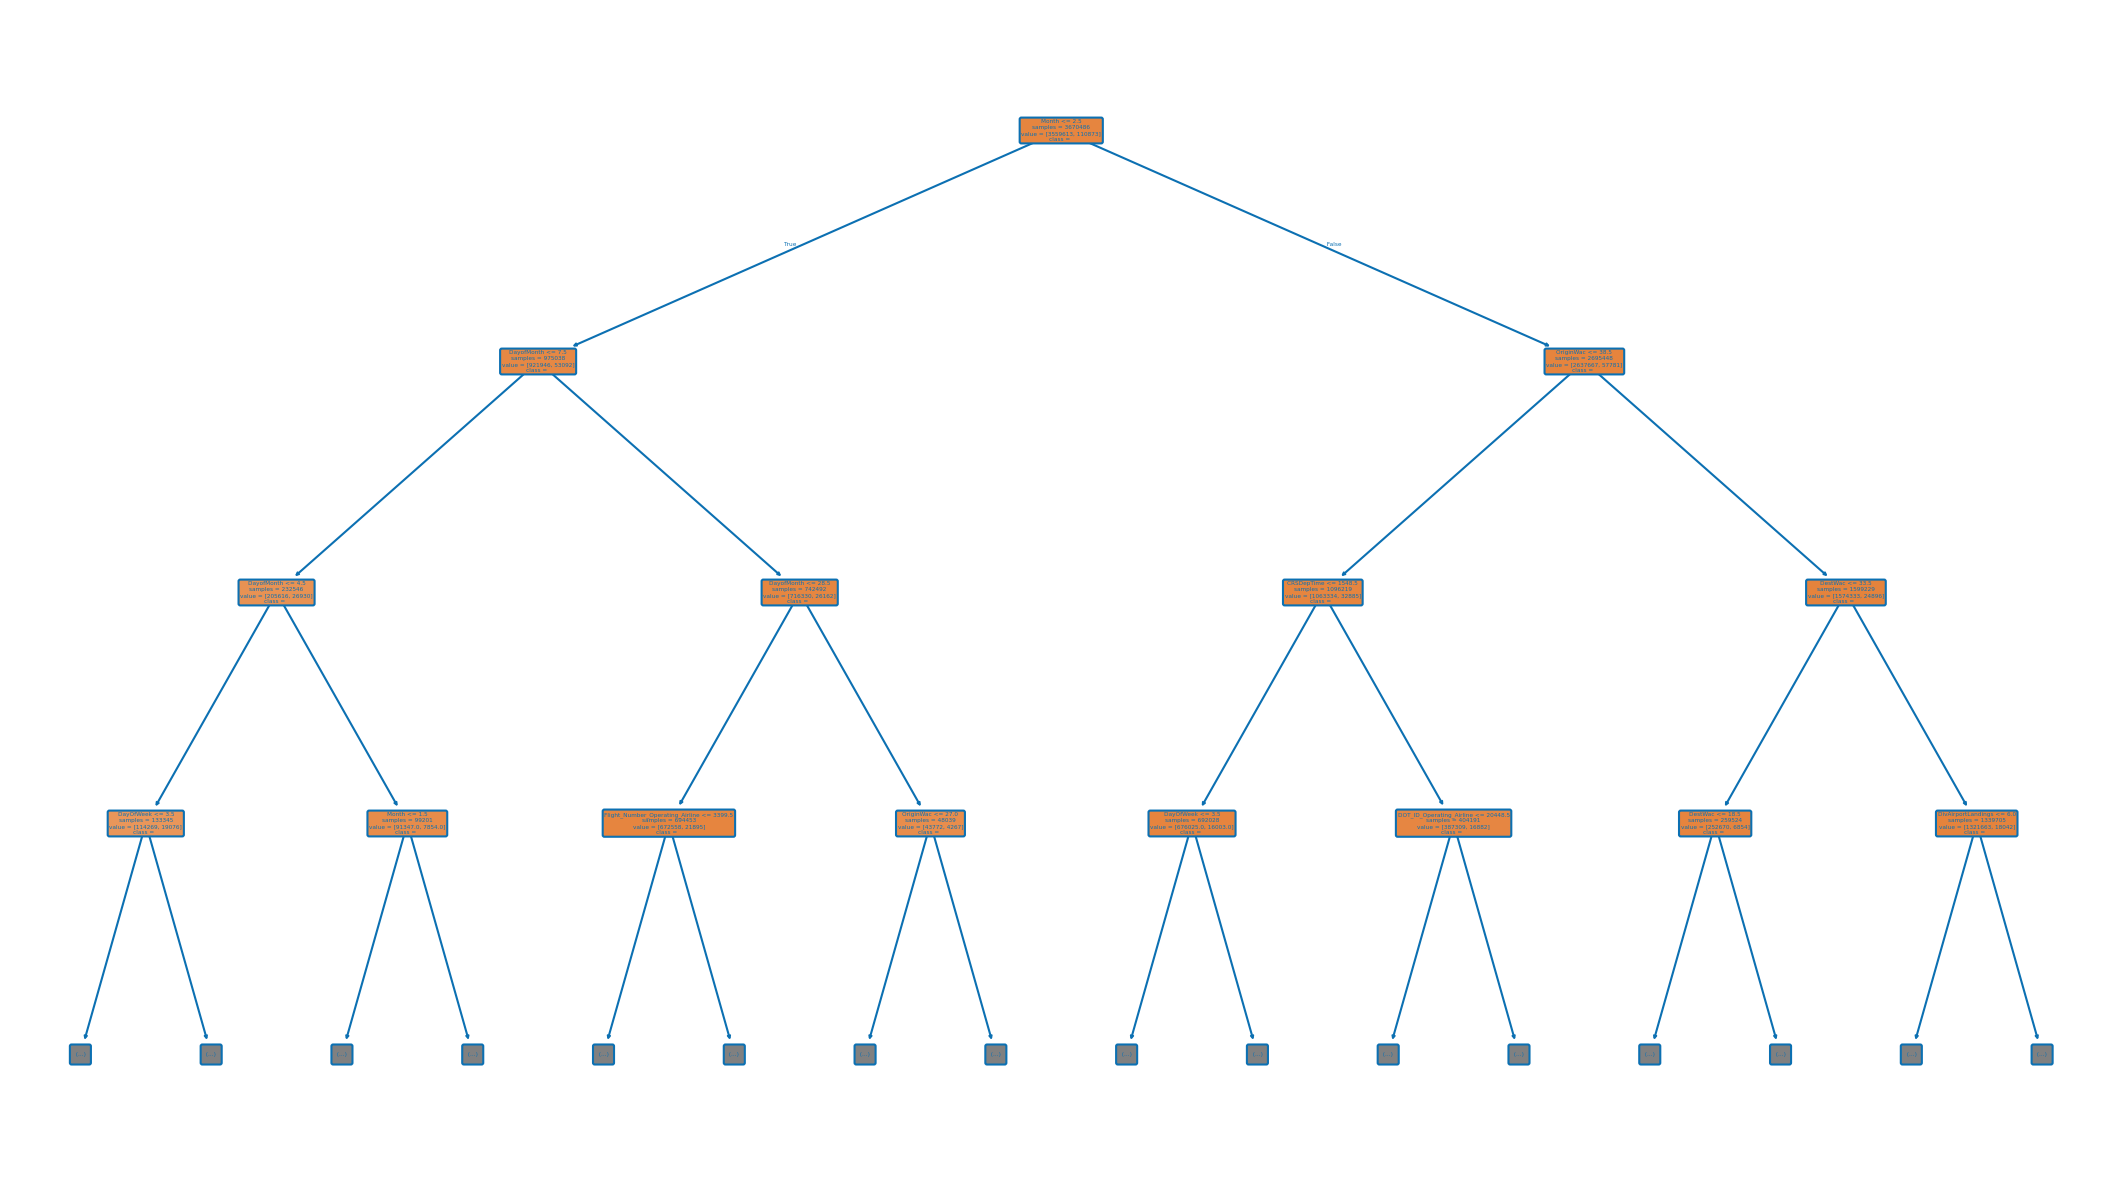

In [17]:
max_depth2show = 3   # adjust if you want deeper/shallower views
dt_feature_names = list(features.columns)

dt_class_names = sorted(str(target.unique()))

figure(figsize=(18, 10))
plot_tree(
    dt_best_model,
    max_depth=max_depth2show,
    feature_names=dt_feature_names,
    class_names=dt_class_names,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_tree_depth{max_depth2show}.png", bbox_inches='tight')
show()

1. DayofMonth (0.2483198509189683)
2. Month (0.16673517896086312)
3. DayOfWeek (0.10416228847985497)
4. DOT_ID_Operating_Airline (0.07382600895251269)
5. OriginWac (0.06921073846692971)
6. DestWac (0.06778595559224805)
7. DOT_ID_Marketing_Airline (0.045263382922615995)
8. CRSDepTime (0.037307376332605786)
9. OriginCityMarketID (0.027261301106918975)
10. DestCityMarketID (0.026352729791825735)
11. Flight_Number_Operating_Airline (0.021980739962762102)
12. OriginStateFips (0.017655785806872187)
13. CRSArrTime (0.013385964403710687)
14. Flight_Number_Marketing_Airline (0.013132156387084013)
15. Quarter (0.013108658158855233)
16. Distance (0.00935440340229297)
17. DestStateFips (0.00896947016256632)
18. DivAirportLandings (0.007531473704426018)
19. OriginAirportID (0.006916010462260484)
20. DestAirportID (0.006716535002001639)
21. CRSElapsedTime (0.006083727412802678)
22. DestAirportSeqID (0.004855751682376574)
23. OriginAirportSeqID (0.003929192375386271)
24. DistanceGroup (0.000155319551

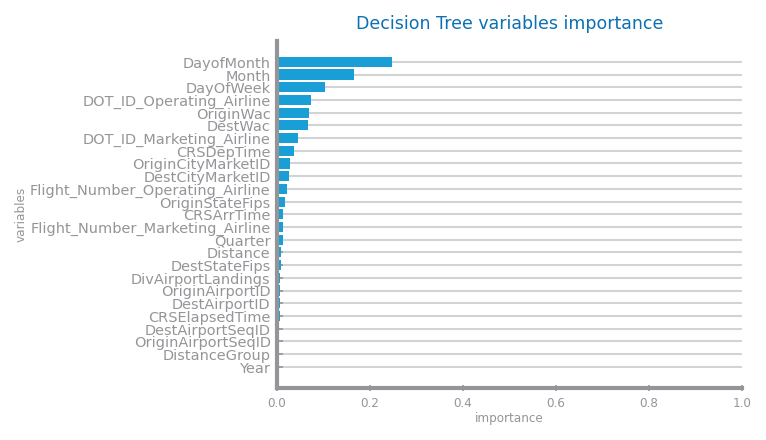

In [18]:
importances = dt_best_model.feature_importances_

indices = argsort(importances)[::-1]
dt_vars = list(features.columns)
elems = []
imp_values = []

# print ranked list like professor
for f in range(len(dt_vars)):
    feature_name = dt_vars[indices[f]]
    feature_imp = importances[indices[f]]

    elems.append(feature_name)
    imp_values.append(feature_imp)

    print(f"{f+1}. {feature_name} ({feature_imp})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_importance_ranking.png", bbox_inches='tight')
show()

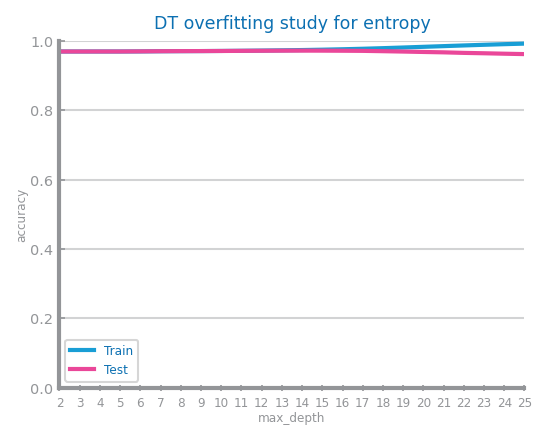

In [19]:
crit = dt_params["params"][0]   # 'entropy' or 'gini'
d_max = 25
depths = [i for i in range(2, d_max + 1, 1)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for d in depths:
    clf = DecisionTreeClassifier(
        max_depth=d,
        criterion=crit,
        min_impurity_decrease=0,
        random_state=42,
    )
    clf.fit(features_train, target_train_bin)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test_bin, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train_bin, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"DT overfitting study for {crit}",
    xlabel="max_depth",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_accuracy_overfitting.png", bbox_inches='tight')
show()

**MLP ANALYSIS - FLIGHT DATA**

In [ ]:
LAG = 100
NR_MAX_ITER = 400

eval_metric = "accuracy"

figure()
mlp_best_model, mlp_params = mlp_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    nr_max_iterations=NR_MAX_ITER,
    lag=LAG,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_mlp_{eval_metric}_study.png", bbox_inches='tight')
show()

In [ ]:
prd_trn_mlp = mlp_best_model.predict(features_train)
prd_tst_mlp = mlp_best_model.predict(features_test)

mlp_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    mlp_params,
    array(target_train_bin),
    array(prd_trn_mlp),
    array(target_test_bin),
    array(prd_tst_mlp),
    mlp_labels,
)
savefig(f"../charts/lab1_baseline/{file_tag}_{mlp_params['name']}_best_{mlp_params['metric']}_eval.png", bbox_inches='tight')
show()

In [ ]:
lr_type = mlp_params["params"][0]
lr = mlp_params["params"][1]

nr_iterations = [i for i in range(LAG, NR_MAX_ITER + 1, LAG)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for n in nr_iterations:
    clf = MLPClassifier(
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="adam",
        verbose=False,
        random_state=42,
    )
    clf.fit(features_train, target_train_bin)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test_bin, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train_bin, prd_trn_Y))

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_mlp_accuracy_overfitting.png", bbox_inches='tight')
show()

In [ ]:
figure()
plot_line_chart(
    arange(len(mlp_best_model.loss_curve_)),
    mlp_best_model.loss_curve_,
    title="Loss curve for MLP best model training",
    xlabel="iterations",
    ylabel="loss",
    percentage=False,
)
savefig(f"../charts/lab1_baseline/{file_tag}_mlp_{eval_metric}_loss_curve.png", bbox_inches='tight')
show()